<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/08_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# Example

In [15]:
# Here are three samples.

sample1 = [2.70011258, 2.80306698, 1.33683463, 2.37597237, 3.3647054 ,
       1.16234416, 2.32761262, 0.20652533, 0.56706787, 1.97381748]

sample2 = [ 1.19556442,  2.64022744,  1.85932857, -0.31834151,  0.97331155,
        2.86337119,  2.01318237,  2.3431587 ,  1.51902731,  3.70903165]

sample3 = [ 2.12712679, -0.0710728 ,  2.5024647 ,  2.77785643,  0.37632828,
        1.98134926,  1.50259064,  2.53715971,  1.85045813,  1.38964944]

# Calculate the statistics of the samples
sample1_mean = np.mean(sample1)
sample1_std = np.std(sample1, ddof = 1 )
print("Sample 1: ")
print(" Mean: {}".format(sample1_mean))
print(" Standard Deviation (Unbiased): {}".format(sample1_std))  

sample2_mean = np.mean(sample2)
sample2_std = np.std(sample2, ddof = 1 )
print("\nSample 2: ")
print(" Mean: {}".format(sample2_mean))
print(" Standard Deviation (Unbiased): {}".format(sample2_std))  

sample3_mean = np.mean(sample3)
sample3_std = np.std(sample3, ddof = 1 )
print("\nSample 3: ")
print(" Mean: {}".format(sample3_mean))
print(" Standard Deviation (Unbiased): {}".format(sample3_std))  

# Let's check the significance of the difference among the three.

Sample 1: 
 Mean: 1.8818059420000002
 Standard Deviation (Unbiased): 1.0284005351286574

Sample 2: 
 Mean: 1.8797861689999997
 Standard Deviation (Unbiased): 1.1243044514744183

Sample 3: 
 Mean: 1.6973910579999998
 Standard Deviation (Unbiased): 0.9318332202443737


# Assumption of equal variances

In [16]:
# Perform Levene test for equal variances

# H0 : The samples have the same variance.
# H1 : The samples do not have the same variance.

test_stat, p = stats.levene (sample1, sample2, sample3)
print("p-value : {}".format(p))

if p < 0.05:
  print("Reject H0 : The samples do not have the same variance.")
else:
  print("Accept H0 : The samples have the same variance.")

p-value : 0.8461262712229266
Accept H0 : The samples have the same variance.


# Step 1. Define null and alternative hypotheses

In [17]:
# H0 : mu_sample1 = mu_sample2 = mu_sample3 
print("H0: All samples are from the same population.")

# H1 : Not (mu_sample1 = mu_sample2 = mu_sample3)
print("H1: Not all samples are from the same population.")

H0: All samples are from the same population.
H1: Not all samples are from the same population.


# Step 2. Calculate a test statistic

In [18]:
# F = between_sample variance / within_sample variance

# between-sample variance
# MS_between
grand_mean = np.mean(sample1+sample2+sample3)
ss_between = np.sum([len(s) * (np.mean(s) - grand_mean) ** 2  for s in [sample1, sample2, sample3]])
df_between = 3 - 1

ms_between = ss_between/df_between
print("MS_between: {}".format(ms_between))

# within-sample variance
# MS_within

ss_within = np.sum([(v - np.mean(s))**2 for s in [sample1, sample2, sample3] for v in s ])
df_within = np.sum( [len(s) - 1 for  s in [sample1, sample2, sample3] ] )

ms_within = ss_within/df_within
print("MS_within: {}".format(ms_within))

F = ms_between / ms_within
print("Test statistic F: {}".format(F))

MS_between: 0.11213484240067906
MS_within: 1.0633271035363674
Test statistic F: 0.10545658248317553


# Step 3. Check how likely the test statistic can be obtained.

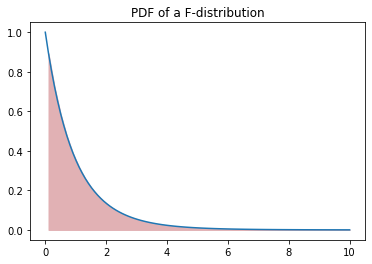

In [19]:
# The F-statistic follows F-distribution.
# The F-distribution is described by DFs of samples.
f_dist = stats.f(dfn = df_between, dfd = df_within)
x = np.linspace(0, 10, 100)  
y = f_dist.pdf(x)      
plt.plot(x, y)
plt.title("PDF of a F-distribution")   

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(F, x[-1], 50) 
plt.fill_between( right_interval, f_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)

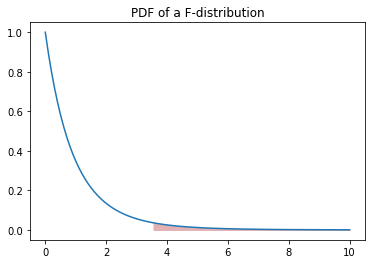

In [20]:
# The F-statistic follows F-distribution.
# The F-distribution is described by DF of a sample.
F = 3.5546
f_dist = stats.f(dfn = 2, dfd = 18) 
x = np.linspace(0, 10, 100)  
y = f_dist.pdf(x)      
plt.plot(x, y)  
plt.title("PDF of a F-distribution") 

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(F, x[-1], 50) 
plt.fill_between( right_interval, f_dist.pdf(right_interval) , color='#e1b1b4', alpha=1)
plt.show()

In [21]:
# Calculate the p-value.
p, _ = integrate.quad(f_dist.pdf, right_interval[0], right_interval[-1]) #  Arg: function, from_value, to_value 

print("The p-value for this test: {}".format(p))

The p-value for this test: 0.04879785889489037


In [22]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0: Not all samples are from the same population.")
else:
  print("Accept H0: All samples are from the same population.")

Reject H0: Not all samples are from the same population.


##### [Additional] You can calculate the p-value by the SF. 

In [23]:
p = f_dist.sf( F )
print("p-value : {0}".format(p))

p-value : 0.049998463974249084


##### [Additional] You can use critical values.

In [24]:
cv = f_dist.ppf(.975)
print("Critical value (alpha = 0.05): {0}".format(cv))

# If the test statistic is beyond the critical values, 
# we should reject the null hypothesis.

Critical value (alpha = 0.05): 4.5596717126520065


### Or you can use codes in the 'stats' module.


In [26]:
F_, p_ = stats.f_oneway(sample1, sample2, sample3)
print("Test statistic F: {}".format(F_))
print("p-value: {}".format(p_))

Test statistic F: 0.10545658248317535
p-value: 0.9002823678875089


# (Step 4) Calculate the effect size

In [ ]:
# The effect size for one-way ANOVA is Eta squared.
# eta^2 = SS_between / (SS_between + SS_within)

e = ss_between / (ss_between + ss_within)

print("Effect size: {}".format(e))